## Imports and Loading Data

In [1]:
## Imports
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
sns.set_style('darkgrid')

In [2]:
## Load data
df = pd.read_csv('Data/clean_fall_data.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2039 entries, 0 to 2038
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 2039 non-null   int64  
 1   distance (cm)              2039 non-null   float64
 2   pressure                   2039 non-null   int64  
 3   hrv (bpm)                  2039 non-null   float64
 4   blood sugar level (mg/dL)  2039 non-null   float64
 5   spo2                       2039 non-null   float64
 6   accelerometer              2039 non-null   int64  
 7   decision                   2039 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 127.6 KB


,Unnamed: 0,distance (cm),pressure,hrv (bpm),blood sugar level (mg/dL),spo2,accelerometer,decision
0,0,25.540,1,101.396,61.080,87.770,1,1
1,1,2.595,2,110.190,20.207,65.190,1,2
2,2,68.067,0,87.412,79.345,99.345,0,0
3,3,13.090,1,92.266,36.180,81.545,1,1
4,4,69.430,0,89.480,80.000,99.990,0,0


In [3]:
## Remove 'Unnamed: 0' column
df = df.drop(columns='Unnamed: 0')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2039 entries, 0 to 2038
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   distance (cm)              2039 non-null   float64
 1   pressure                   2039 non-null   int64  
 2   hrv (bpm)                  2039 non-null   float64
 3   blood sugar level (mg/dL)  2039 non-null   float64
 4   spo2                       2039 non-null   float64
 5   accelerometer              2039 non-null   int64  
 6   decision                   2039 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 111.6 KB


,distance (cm),pressure,hrv (bpm),blood sugar level (mg/dL),spo2,accelerometer,decision
0,25.540,1,101.396,61.080,87.770,1,1
1,2.595,2,110.190,20.207,65.190,1,2
2,68.067,0,87.412,79.345,99.345,0,0
3,13.090,1,92.266,36.180,81.545,1,1
4,69.430,0,89.480,80.000,99.990,0,0


## Univariate Analysis

In [4]:
## Statistical description of the data
df.describe()

,distance (cm),pressure,hrv (bpm),blood sugar level (mg/dL),spo2,accelerometer,decision
count,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000
mean,28.694527,0.988720,95.657002,72.909243,83.563649,0.661599,0.988720
std,23.773644,0.815918,17.576499,46.940110,11.111592,0.473282,0.815918
min,0.000000,0.000000,60.000000,10.000000,60.000000,0.000000,0.000000
25%,7.642500,0.000000,82.418000,40.230000,75.285000,0.000000,0.000000
50%,20.560000,1.000000,97.238000,69.960000,85.280000,1.000000,1.000000
75%,55.205500,2.000000,109.695000,77.612500,92.692500,1.000000,2.000000
max,69.981000,2.000000,124.980000,179.293000,99.990000,1.000000,2.000000


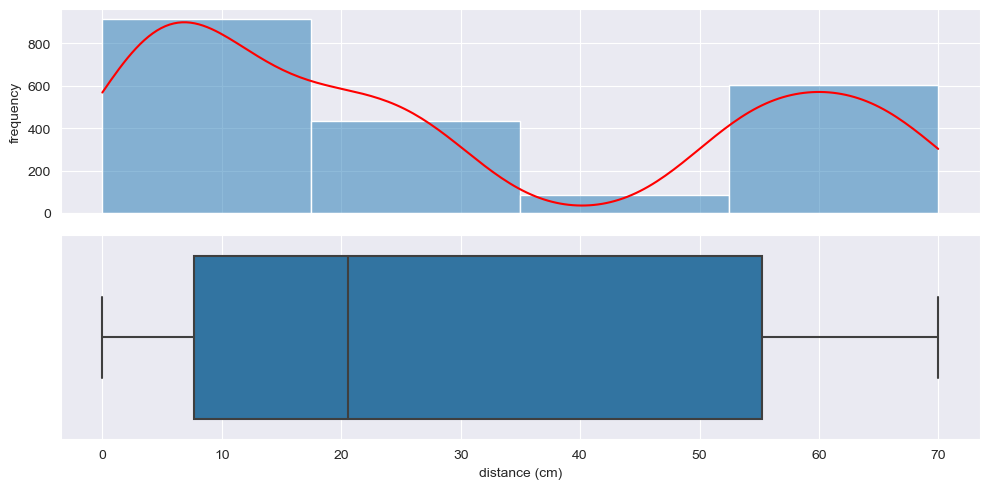

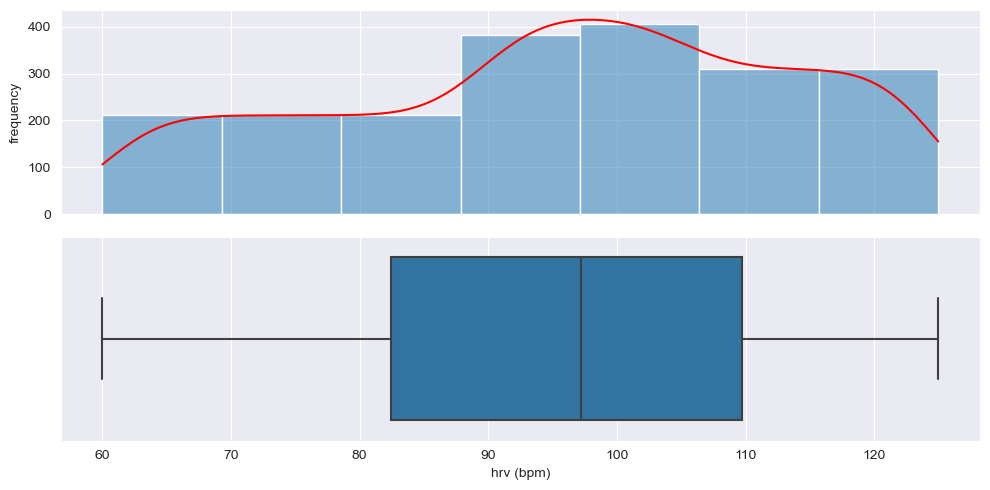

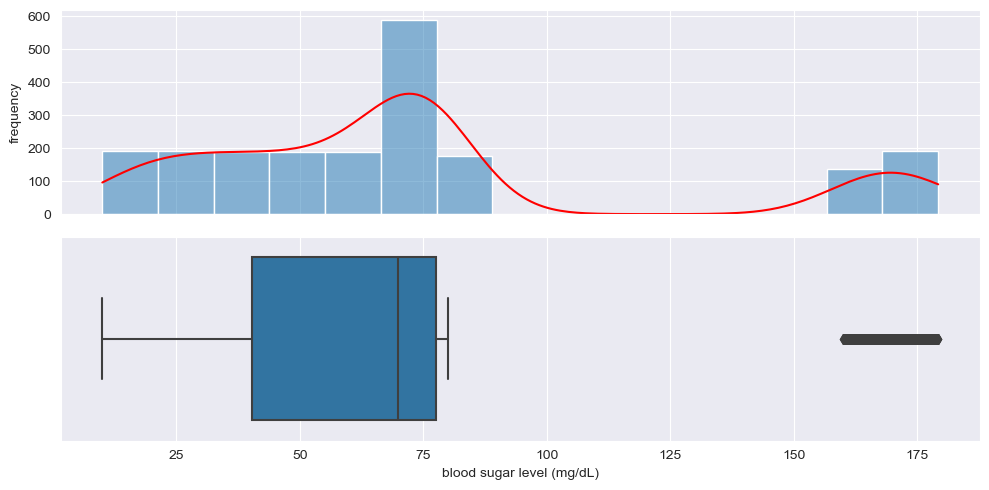

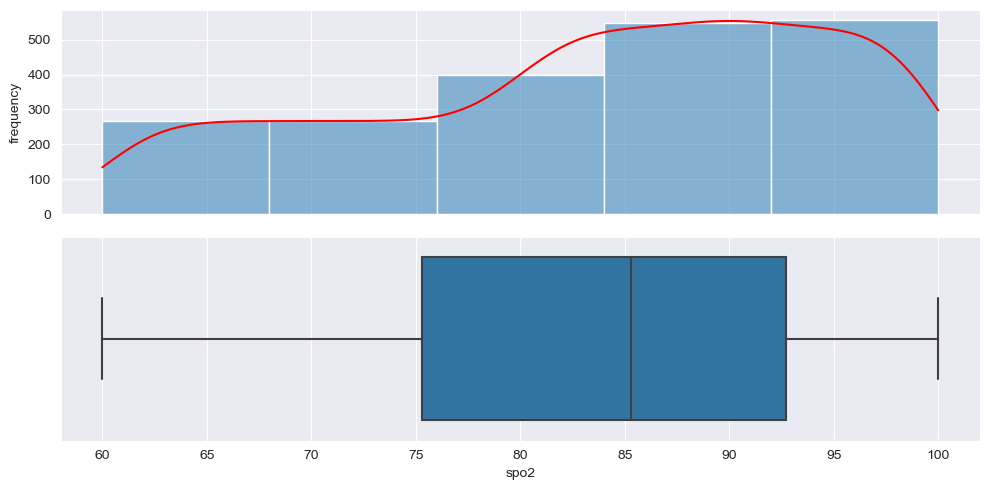

In [5]:
# Create histograms and boxplots for continuous features

## Dictionary for custom bing settings when iterating through features
bin_settings = {'distance (cm)': 4,'hrv (bpm)': 7,
                'blood sugar level (mg/dL)':15, 'spo2': 5}

## For loop to iterate through continuous features and display histogram and
## boxplot, sharing the x-axis
for col in df:
    
    ## If statement to select dtype
    if df[col].dtype == 'float64':
        
        ## Saving the bins dictionary to a variable
        bins = bin_settings.get(col, 'auto')
        
        ## Subplots configuration
        fig, ax = plt.subplots(2,1, figsize=(10,5), sharex=True)
        
        ## Histogram
        sns.histplot(data=df[col], bins=bins, kde=True, ax=ax[0])
        ax[0].lines[0].set_color('red')
        ax[0].set_ylabel('frequency')

        ## Boxplot
        sns.boxplot(data=df, x=df[col], ax=ax[1])
        
        plt.tight_layout()
        plt.show()

> - Distance (cm): Non-symmetric bimodal with right skew with the most frequency from 0 cm - ~18 cm and the least frequency from ~35 cm - ~55 cm. Median approx. 52 cm.
> - HRV (BPM): Relatively uniform and highest frequency from ~115 bpm to ~125 bpm. Median is approx. 97 bpm. 
> - Blood Sugar Level (mg/dL): Bimodal with a median approx. 74 mg/dL. There are a significant amount of outliers. The lowest blood glucose level is 10 mg/dL. Anything under 54 mg/dL is considered a medical emergency, so those readings don't make sense in this context. They will be removed and the data will be re-visualized.
> - SPO2: Left skew with some uniform data at two levels. Most of the data occurs between ~84% - ~100% oxygen saturation. Median is approx. 91% oxygen saturation.


In [19]:
## Filtering the dataframe to exlude any blood glucose reading below 55
df = df.drop(df[df['blood sugar level (mg/dL)'] < 55].index)
df.describe()

,distance (cm),pressure,hrv (bpm),blood sugar level (mg/dL),spo2,accelerometer,decision
count,1283.000000,1283.000000,1283.000000,1283.000000,1283.000000,1283.000000,1283.000000
mean,39.654478,0.717849,92.200083,96.786919,88.594318,0.462198,0.717849
std,23.281800,0.845222,20.476351,43.175241,8.781026,0.498763,0.845222
min,5.085000,0.000000,60.000000,55.020000,70.170000,0.000000,0.000000
25%,9.892500,0.000000,74.102000,70.832500,79.785000,0.000000,0.000000
50%,51.392000,0.000000,88.204000,75.640000,90.720000,0.000000,0.000000
75%,60.686500,2.000000,115.365000,160.383500,95.527500,1.000000,2.000000
max,69.981000,2.000000,124.980000,179.293000,99.990000,1.000000,2.000000


> The minimum value in the blood glucose column is now 55.02

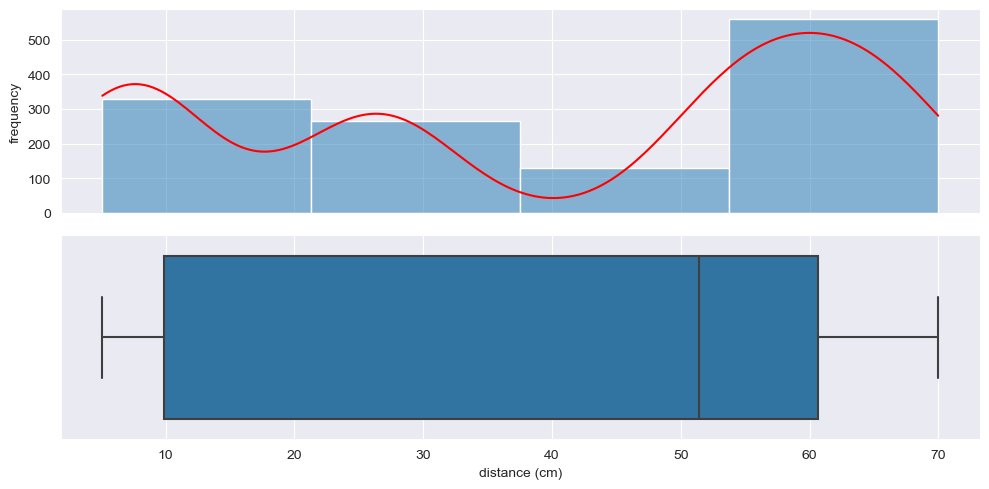

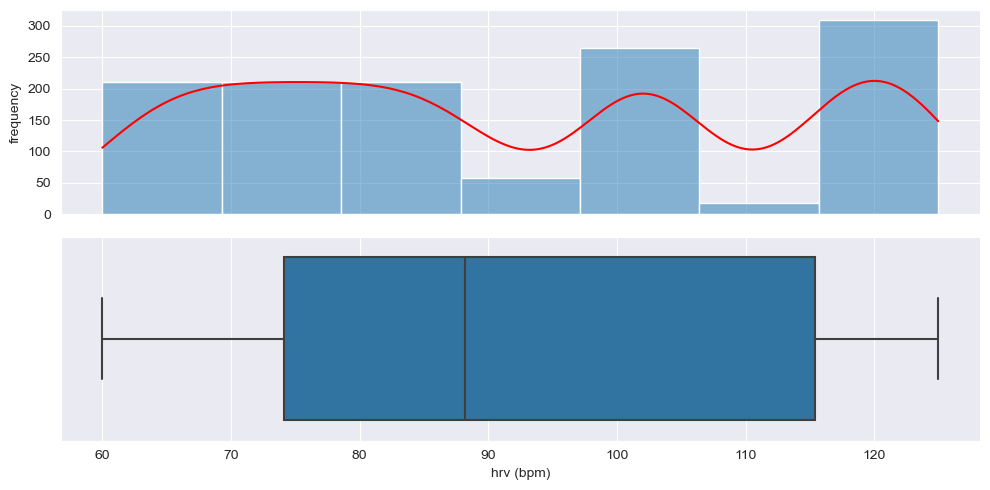

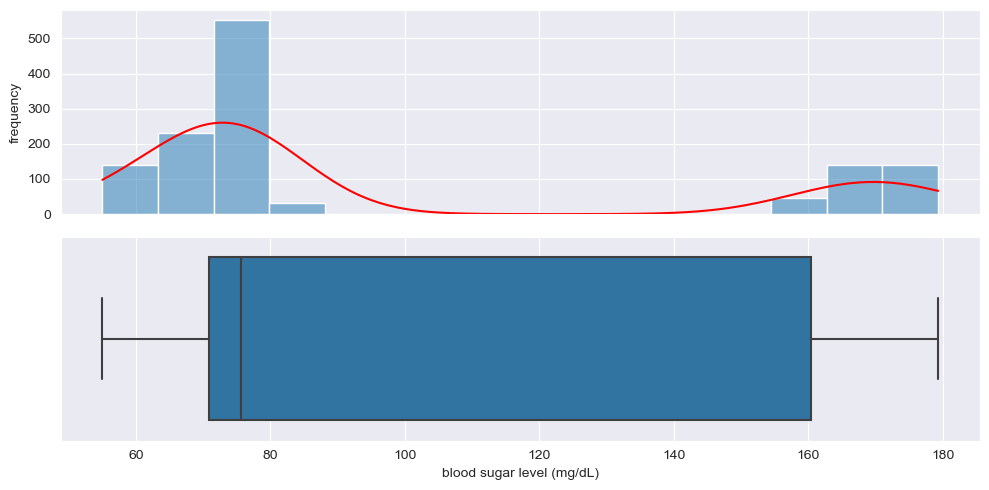

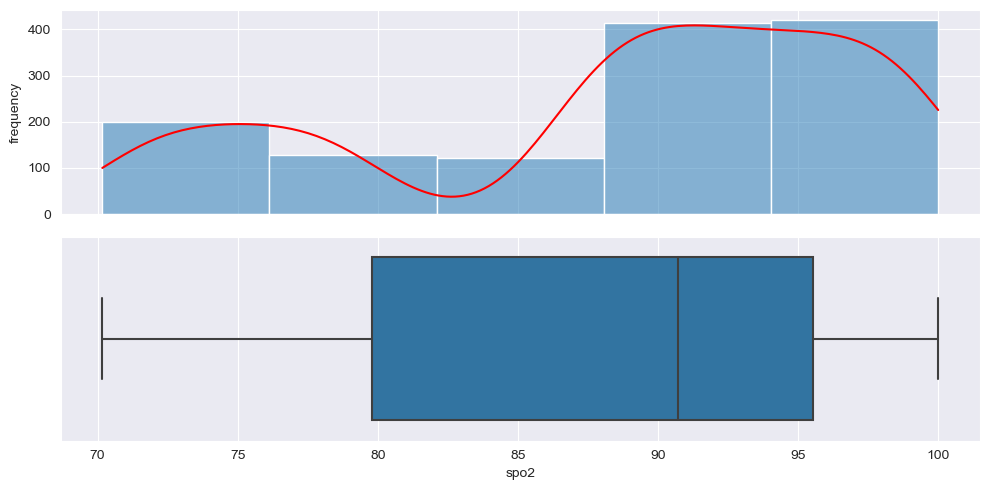

In [20]:
## For loop to iterate through continuous features and display histogram and
## boxplot, sharing the x-axis
for col in df:
    
    ## If statement to select dtype
    if df[col].dtype == 'float64':
        
        ## Saving the bins dictionary to a variable
        bins = bin_settings.get(col, 'auto')
        
        ## Subplots configuration
        fig, ax = plt.subplots(2,1, figsize=(10,5), sharex=True)
        
        ## Histogram
        sns.histplot(data=df[col], bins=bins, kde=True, ax=ax[0])
        ax[0].lines[0].set_color('red')
        ax[0].set_ylabel('frequency')

        ## Boxplot
        sns.boxplot(data=df, x=df[col], ax=ax[1])
        
        plt.tight_layout()
        plt.show()

> - Distance (cm): Median stayed the same at approx. 52 cm. The data is now left skewed and the has the most frequency from ~55 cm - ~70 cm.
> - HRV (BPM): Relatively uniform with some troughs and highest frequency from ~115 bpm to ~125 bpm. Median changed to ~88 bpm. 
> - Blood Sugar Level (mg/dL): Data is still bimodal, but there are now no outliers in the boxplot. The median did not change much and is approx. 78 mg/dL.
> - SPO2: Left skew with some uniform data at two levels. Most of the data occurs between ~87% - ~100% oxygen saturation. Median is the same at approx. 91% oxygen saturation.

In [7]:
## Creating new dataframe for categorical features
## Create empty dataframe
cat_df = pd.DataFrame()
for col in df:
    if df[col].dtype == 'int64':
        cat_df[col] = df[col]

In [8]:
cat_df.info()
cat_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1283 entries, 0 to 2038
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   pressure       1283 non-null   int64
 1   accelerometer  1283 non-null   int64
 2   decision       1283 non-null   int64
dtypes: int64(3)
memory usage: 40.1 KB


,pressure,accelerometer,decision
0,1,1,1
2,0,0,0
4,0,0,0
5,1,1,1
6,0,0,0


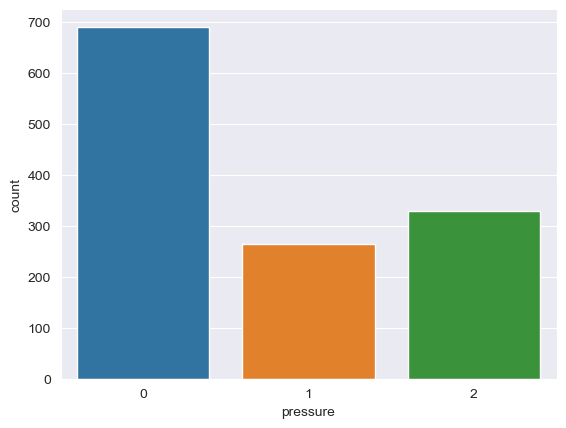

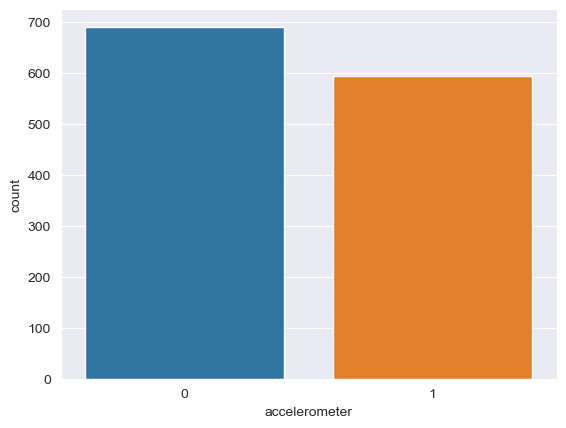

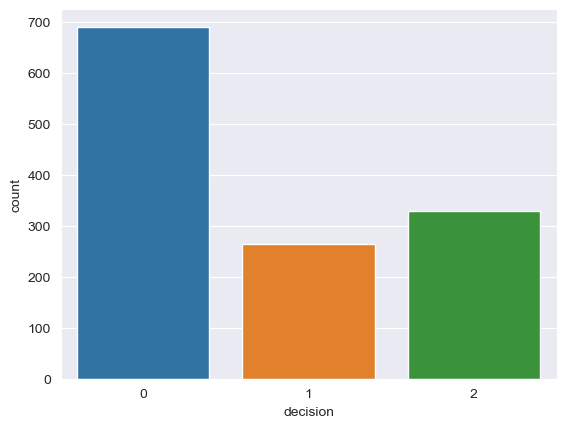

In [9]:
## For loop to plot categorical columns
for col in cat_df:
    ## Subplots
    fig, ax = plt.subplots()
        
    ## Barplots
    sns.barplot(x=df[col].value_counts().index, y=df[col].value_counts())

In [22]:
## Evaluating class balance in the target
df['decision'].value_counts(normalize=True)

decision
0    0.537802
2    0.255651
1    0.206547
Name: proportion, dtype: float64

## Multivariate Analysis

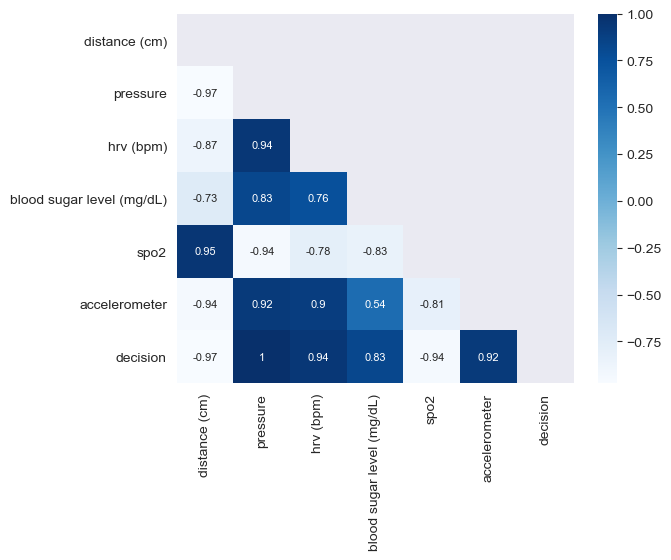

In [10]:
# Create correlation heatmap
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, cmap='Blues', annot=True, annot_kws={'size':8}, mask=mask)
plt.xticks(rotation=90)
plt.yticks(rotation=0);

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1283 entries, 0 to 2038
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   distance (cm)              1283 non-null   float64
 1   pressure                   1283 non-null   int64  
 2   hrv (bpm)                  1283 non-null   float64
 3   blood sugar level (mg/dL)  1283 non-null   float64
 4   spo2                       1283 non-null   float64
 5   accelerometer              1283 non-null   int64  
 6   decision                   1283 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 80.2 KB


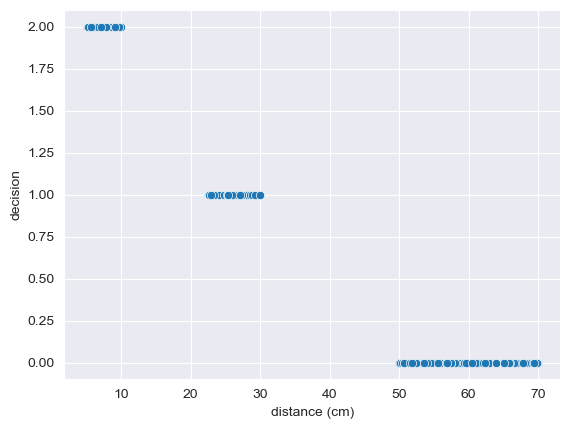

In [12]:
sns.scatterplot(data=df, x=df['distance (cm)'], y=df['decision']);

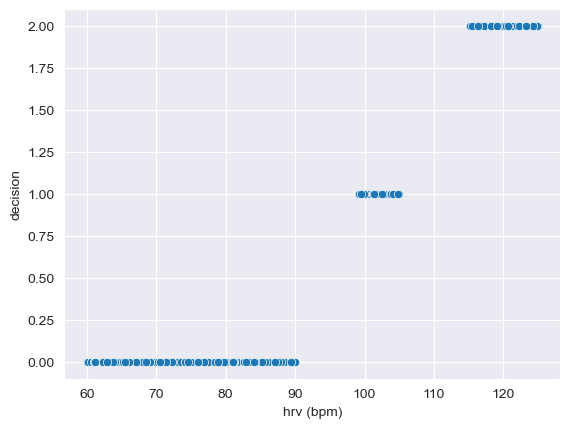

In [13]:
sns.scatterplot(data=df, x=df['hrv (bpm)'], y=df['decision']);

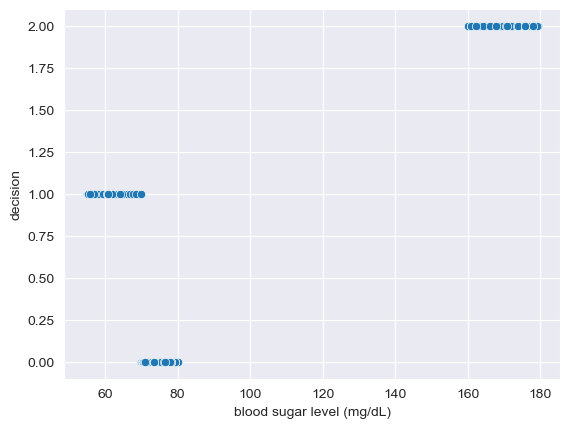

In [14]:
sns.scatterplot(data=df, x=df['blood sugar level (mg/dL)'], y=df['decision']);

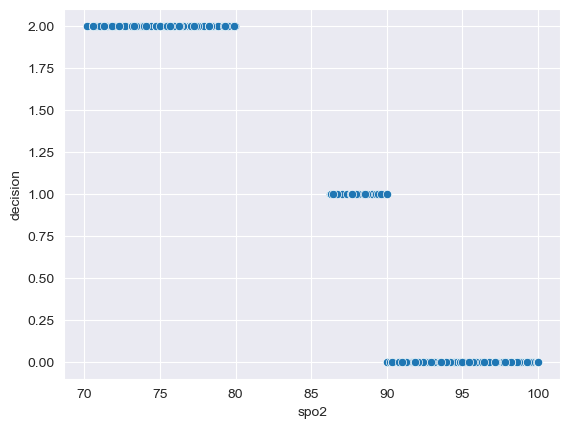

In [15]:
sns.scatterplot(data=df, x=df['spo2'], y=df['decision']);

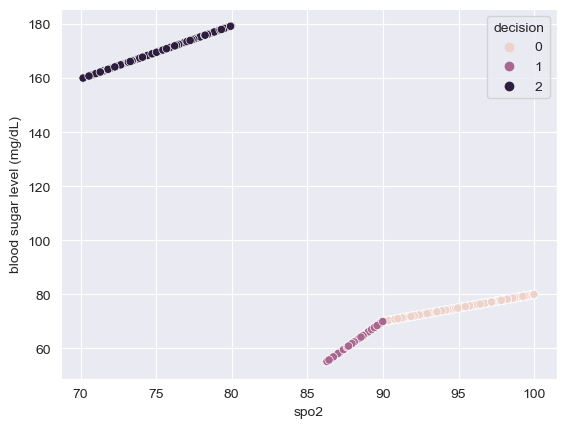

In [16]:
sns.scatterplot(data=df, x=df['spo2'], y=df['blood sugar level (mg/dL)'],
                hue=df['decision']);

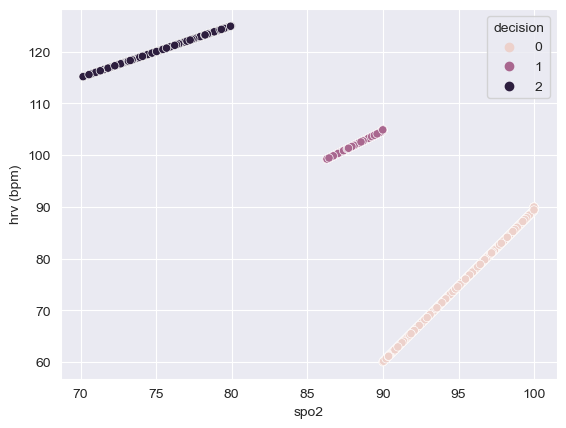

In [17]:
sns.scatterplot(data=df, x=df['spo2'], y=df['hrv (bpm)'],
                hue=df['decision']);

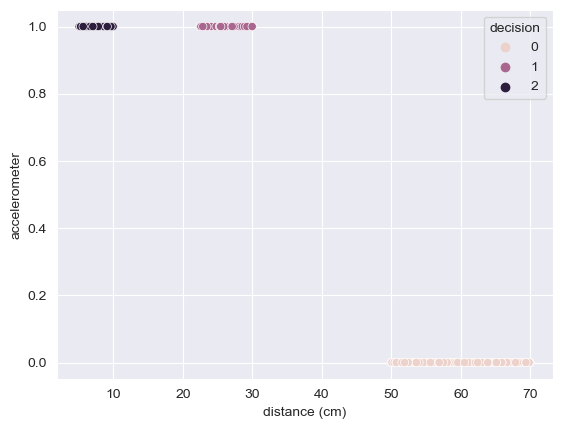

In [18]:
sns.scatterplot(data=df, x=df['distance (cm)'], y=df['accelerometer'],
                hue=df['decision']);